In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
X_train = np.reshape( x_train, (60000,28*28) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
y_train = (y_train%2 == 0).astype(int)
y_test  = (y_test%2 == 0).astype(int)

In [9]:
y_train[0:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [10]:
dimension_entrada = X_train.shape[1]
dimension_salida = 1
modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada, activation="relu"))
#modelo.add(Input(shape=dimension_entrada))
#modelo.add(Dense(20, activation="relu"))
modelo.add(Dense(1, activation="sigmoid"))
sgd=SGD(learning_rate=0.1)
modelo.compile(loss="binary_crossentropy", optimizer=sgd,
               metrics=["accuracy"])
modelo.summary()

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,721 (61.41 KB)

 Trainable params: 15,721 (61.41 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 10
batch_size = 20
historia = modelo.fit(X_train, y_train, 
                      epochs=epochs, batch_size=batch_size)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9062 - loss: 0.2320
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9690 - loss: 0.0889
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9749 - loss: 0.0718
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9784 - loss: 0.0615
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9806 - loss: 0.0541
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9841 - loss: 0.0485
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9832 - loss: 0.0465
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9855 - loss: 0.0426
Epoch 9/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9861 - loss: 0.0403
Epoch 10/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - accuracy: 0.9867 - loss: 0.0371


In [12]:
y_pred = modelo(X_test[0:10])
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.6016166e-04],
       [9.7884142e-01],
       [2.4336257e-03],
       [9.9997699e-01],
       [9.9499166e-01],
       [1.5089597e-04],
       [9.9975950e-01],
       [7.8967772e-04],
       [5.4321587e-01],
       [1.9962365e-04]], dtype=float32)>

In [13]:
y_test[0:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

<Axes: >

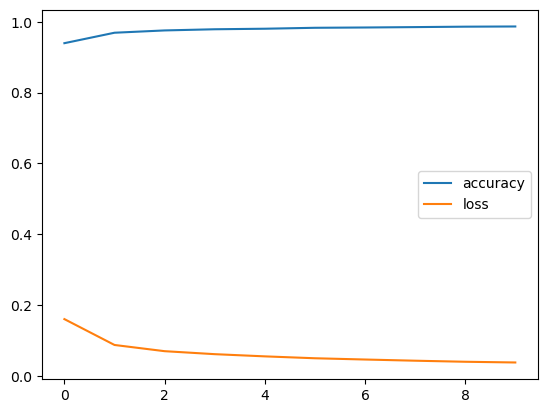

In [14]:
pd.DataFrame(historia.history).plot()

In [15]:
#TensorBoard
import os
root_logdir = os.path.join(".", "archives/logs")
modelo.compile(loss="binary_crossentropy", optimizer=sgd,  metrics=["accuracy"])
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
epochs = 6
batch_size = 20
historia = modelo.fit(X_train, y_train, epochs=epochs,
                      batch_size = batch_size,
                      callbacks=[tensorboard_cb])

Epoch 1/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9875 - loss: 0.0367
Epoch 2/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9893 - loss: 0.0305
Epoch 3/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0303
Epoch 4/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9907 - loss: 0.0270
Epoch 5/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9916 - loss: 0.0258
Epoch 6/6
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9908 - loss: 0.0257


In [16]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 22068), started 0:02:23 ago. (Use '!kill 22068' to kill it.)